In [55]:
%load_ext autoreload
%autoreload 2

# interactive in the notebook
# %matplotlib notebook

# inlined but not interactive
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from starter import Agent
import pylab as plb
import sys

Let's test it works

In [ ]:
d = Agent(side_size=8)
tries = []
# plb.ion()
plb.pause(0.001)
fig = plb.figure()

for i in range(2):
    print("Episode ", i+1)
    sys.stdout.flush()
    d.episode(3000, tau = .05, animation=True, fig=fig) # simulation
    tries.append(d.mountain_car.t) # whendoes it end ?  (step) 
    
#     d.visualize_field() # visualize best action field


### Simulate 10 agents and plot their averaged learning curve

In [ ]:
num_agents = 20
num_episodes = 50
agents = []
escape_times = np.empty((num_agents, num_episodes))

for agent_id in range(num_agents):
    agents.append(Agent(side_size = 8))

for episode_id in range(num_episodes):
    print("Starting episode", episode_id)
    sys.stdout.flush()
    for agent_id in range(num_agents):
        agents[agent_id].episode(n_steps=2000)
        escape_times[agent_id, episode_id] = agents[agent_id].mountain_car.t
        

In [ ]:
avg_escape_times = escape_times.mean(axis=0)
plb.plot(avg_escape_times)

plb.xlabel("Episode")
plb.ylabel("Escape time")
plb.title("Average escape time smoothed over {n} agents\n({s}x{s} grid, tau={t})".format(
           n=num_agents, s=agents[0].side_size, t=agents[0].tau))

## Multiprocessing tests. 

This may not work on Windows :( http://stackoverflow.com/questions/7067787/python-multiprocessing-processes-become-copies-of-the-main-process-when-run-fr/7079399#7079399

Nope, this doesn't work in the notebook either, because of `multiprocessing` peculiarities, so it has to be run from a file.

We show the file here for convenience:

In [21]:
from IPython.core import page
page.page = print
%pycat threaded.py

# because multiprocessing Pool cannot run in interactive mode, we put it in a file

from multiprocessing import Pool
from starter import Agent

def make_and_run(size):
    a = Agent(side_size=size)
    for e in range(60):
        a.episode()
        # if 5 times in a row we escape in less than 150 steps
        if e > 5 and sum(a.escape_times[-5:]) / 5 < 150:
            break
    return [size, e]

def main():
    p = Pool(6)
    episodes_per_size = []

    # 5 agents of each size from 6 -> 11
    for res in p.map(make_and_run, sorted(list(range(7,12)) * 5)):
        episodes_per_size.append(res)

    print(episodes_per_size)

if __name__ == "__main__":
    main()



In [15]:
episodes_per_size = ! python threaded.py

In [23]:
episodes_per_size = eval(episodes_per_size[0])

In [50]:
episodes_per_size = np.array(episodes_per_size).reshape((5,5,2))
episodes_per_size

array([[[ 7, 16],
        [ 7, 26],
        [ 7, 16],
        [ 7, 26],
        [ 7, 16]],

       [[ 8, 21],
        [ 8, 24],
        [ 8, 20],
        [ 8, 24],
        [ 8, 20]],

       [[ 9, 27],
        [ 9, 25],
        [ 9, 32],
        [ 9, 19],
        [ 9, 24]],

       [[10, 31],
        [10, 23],
        [10, 34],
        [10, 31],
        [10, 17]],

       [[11, 26],
        [11, 22],
        [11, 30],
        [11, 29],
        [11, 30]]])

In [57]:
avg_ep_size = episodes_per_size.mean(axis=1)
avg_ep_size

array([[  7. ,  20. ],
       [  8. ,  21.8],
       [  9. ,  25.4],
       [ 10. ,  27.2],
       [ 11. ,  27.4]])

In [61]:
%matplotlib notebook

<IPython.core.display.Javascript object>


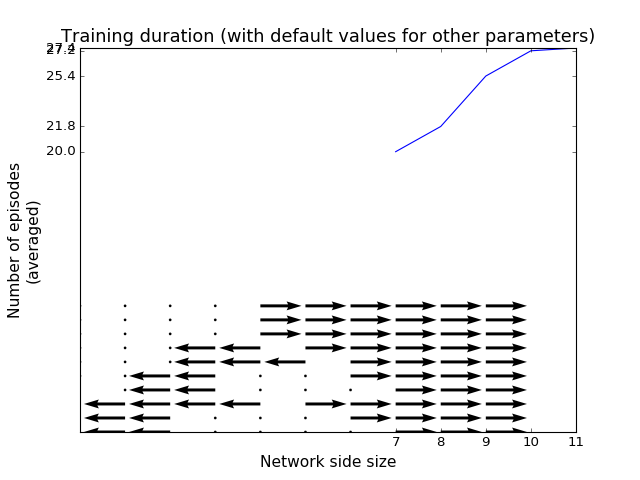

In [69]:
plb.plot(avg_ep_size[:,0], avg_ep_size[:,1])
plb.xticks(avg_ep_size[:,0])
plb.yticks(avg_ep_size[:,1])
plb.xlabel('Network side size', fontsize=14)
plb.ylabel('Number of episodes\n(averaged)', fontsize=14)
plb.title('Training duration (with default values for other parameters)', fontsize=16)

---

### Vector field testing

In [70]:
a = Agent()
for e in range(20):
    a.episode()

In [89]:
field_data = a.visualize_field()
dummy_up = np.zeros_like(field_data)

[[-1. -1. -1.  0.  0.  0.  0.  1.  1.  1.]
 [-1. -1. -1.  0.  0.  0.  1.  1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [-1.  0. -1. -1.  0.  0.  0.  1.  1.  1.]
 [ 0.  0. -1. -1.  0.  0.  1.  1.  1.  1.]
 [ 0.  0.  0. -1. -1. -1.  1.  1.  1.  1.]
 [ 0.  0.  0. -1. -1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.]]


In [97]:
np.set_printoptions(precision=2, )
print(a.centres_x.flatten())
print(a.centres_v.flatten())

[-150. -130. -110.  -90.  -70.  -50.  -30.  -10.   10.   30.]
[-15.   -11.67  -8.33  -5.    -1.67   1.67   5.     8.33  11.67  15.  ]


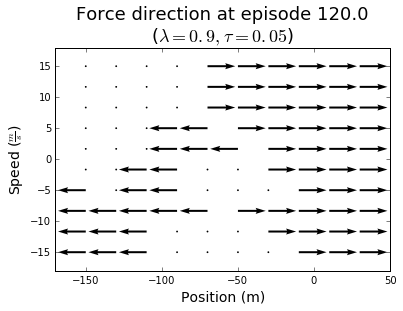

In [134]:
a.visualize_field()

In [115]:
# %matplotlib notebook
%matplotlib inline

### Different initial weights

In [176]:
%pycat policy_threaded.py

# because multiprocessing Pool cannot run in interactive mode, we put it in a file

from multiprocessing import Pool
from starter import Agent

def make_and_run(init_w):
    d = 8
    w = np.full((3,d,d), init_w)
    a = Agent(side_size=d, weights=w)
    for e in range(50):
        a.episode()
    return [init_w, a.escape_times]

def main():
    p = Pool(6)
    # init_w -- 12 examples of each
    agents = [0, 1] * 12
    results = []

    for res in p.map(make_and_run, agents):
        results.append(res)

    print(results)

if __name__ == "__main__":
    main()



We run the previous file in steps, modifying the parameters there for getting a figure

First with init w = 1

In [208]:
results_text = ! python policy_threaded.py

In [209]:
results_text # print it here, in case you destroy it later you can copy-paste the data

['[[1078.0, 1710.0, 913.0, 471.0, 218.0, 832.0, 446.0, 339.0, 305.0, 316.0, 385.0, 247.0, 339.0, 176.0, 318.0, 188.0, 191.0, 213.0, 185.0, 61.0, 131.0, 131.0, 122.0, 45.0, 112.0, 57.0, 96.0, 85.0, 70.0, 34.0, 53.0, 57.0, 52.0, 87.0, 57.0, 91.0, 51.0, 67.0, 70.0, 99.0, 67.0, 32.0, 36.0, 31.0, 75.0, 54.0, 29.0, 42.0, 44.0, 27.0], [1078.0, 1710.0, 913.0, 471.0, 218.0, 832.0, 446.0, 339.0, 305.0, 316.0, 385.0, 247.0, 339.0, 176.0, 318.0, 188.0, 191.0, 213.0, 185.0, 61.0, 131.0, 131.0, 122.0, 45.0, 112.0, 57.0, 96.0, 85.0, 70.0, 34.0, 53.0, 57.0, 52.0, 87.0, 57.0, 91.0, 51.0, 67.0, 70.0, 99.0, 67.0, 32.0, 36.0, 31.0, 75.0, 54.0, 29.0, 42.0, 44.0, 27.0], [1078.0, 1710.0, 913.0, 471.0, 218.0, 832.0, 446.0, 339.0, 305.0, 316.0, 385.0, 247.0, 339.0, 176.0, 318.0, 188.0, 191.0, 213.0, 185.0, 61.0, 131.0, 131.0, 122.0, 45.0, 112.0, 57.0, 96.0, 85.0, 70.0, 34.0, 53.0, 57.0, 52.0, 87.0, 57.0, 91.0, 51.0, 67.0, 70.0, 99.0, 67.0, 32.0, 36.0, 31.0, 75.0, 54.0, 29.0, 42.0, 44.0, 27.0], [1078.0, 1710.0,

In [222]:
escape_times = np.array(eval(results_text[0]))

In [217]:
avg_escape_times = escape_times.mean(axis=0)

Then with init w = 0

In [223]:
results_text = ! python policy_threaded.py

In [225]:
results_text

['[[2000.0, 2000.0, 955.0, 1644.0, 2000.0, 2000.0, 1361.0, 1180.0, 735.0, 1211.0, 376.0, 911.0, 405.0, 1060.0, 211.0, 2000.0, 238.0, 934.0, 1092.0, 1237.0, 106.0, 342.0, 77.0, 1841.0, 843.0, 68.0, 107.0, 250.0, 62.0, 451.0, 132.0, 777.0, 59.0, 767.0, 924.0, 120.0, 391.0, 1513.0, 74.0, 202.0, 67.0, 119.0, 57.0, 98.0, 2000.0, 84.0, 81.0, 201.0, 101.0, 1065.0], [2000.0, 2000.0, 955.0, 1644.0, 2000.0, 2000.0, 1361.0, 1180.0, 735.0, 1211.0, 376.0, 911.0, 405.0, 1060.0, 211.0, 2000.0, 238.0, 934.0, 1092.0, 1237.0, 106.0, 342.0, 77.0, 1841.0, 843.0, 68.0, 107.0, 250.0, 62.0, 451.0, 132.0, 777.0, 59.0, 767.0, 924.0, 120.0, 391.0, 1513.0, 74.0, 202.0, 67.0, 119.0, 57.0, 98.0, 2000.0, 84.0, 81.0, 201.0, 101.0, 1065.0], [2000.0, 2000.0, 955.0, 1644.0, 2000.0, 2000.0, 1361.0, 1180.0, 735.0, 1211.0, 376.0, 911.0, 405.0, 1060.0, 211.0, 2000.0, 238.0, 934.0, 1092.0, 1237.0, 106.0, 342.0, 77.0, 1841.0, 843.0, 68.0, 107.0, 250.0, 62.0, 451.0, 132.0, 777.0, 59.0, 767.0, 924.0, 120.0, 391.0, 1513.0, 74.0

In [226]:
escape_times0 = np.array(eval(results_text[0]))
avg_escape_times0 = escape_times0.mean(axis=0)

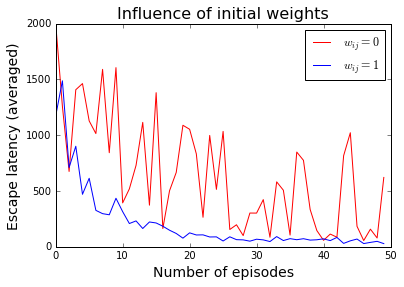

In [234]:
plb.plot(avg_escape_times0, 'r')
plb.plot(avg_escape_times , 'b') 
plb.legend(['$w_{ij} = 0$', '$w_{ij} = 1$'])
plb.xlabel('Number of episodes', fontsize=14)
plb.ylabel('Escape latency (averaged)', fontsize=14)
plb.title("Influence of initial weights", fontsize=16)

### $\tau$ exploration

In [255]:
results_text = ! python tau_threaded.py

In [242]:
def plot_learning_curve(escape_times, tau):
    plb.plot(escape_times)
    plb.xlabel('Number of episodes', fontsize=14)
    plb.ylabel('Escape latency (averaged)', fontsize=14)
    plb.title(r"Exploration vs. Exploitation ($\tau = {t}$)".format(t=tau), fontsize=16)

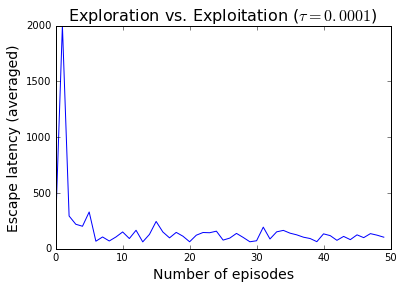

In [254]:
plot_learning_curve(a.escape_times, a.tau)

---

In [ ]:
N = 8
for i in range(N):
    plt.figure()
    plt.title(i)
    plt.plot(x[0,[i+j*N for j in range(N)]])
    plt.plot(x[1,[i+j*N for j in range(N)]])
    plt.plot(x[2,[i+j*N for j in range(N)]])

In [ ]:
for i in range(20):
    plt.figure()
    plt.title(i)
    plt.plot(x[0,[j+i*20 for j in range(20)]])
    plt.plot(x[1,[j+i*20 for j in range(20)]])
    plt.plot(x[2,[j+i*20 for j in range(20)]])